# Tutorial - Step1 : MTMR pretraining with Metric learning

## 1. Import requirements

In [1]:
import os
import pandas as pd
import torch
import time
import matplotlib.pyplot as plt

In [2]:
from MTMR.dataset import TrainingSmilesDataset, ValidationSmilesDataset
from MTMR.vae import SmilesAutoencoder, AnnealingScheduler

## 2. Configure GPU (if available)

In [3]:
use_cuda = torch.cuda.is_available()
device = torch.device("cuda:0" if use_cuda else "cpu")
print(device)

cuda:0


## 3. Specify a target property

In [4]:
PROPERTY_NAME = "logp04"

## 4. Set directories (for inputs and outputs)

In [5]:
input_dir = os.path.join("DATA", PROPERTY_NAME)

In [6]:
_output_dir = "outputs_Tutorial_1_MTMR_pretraining_latent8"
if not os.path.exists(_output_dir):
    os.mkdir(_output_dir)

output_dir = os.path.join(_output_dir, PROPERTY_NAME)
if not os.path.exists(output_dir):
    os.mkdir(output_dir)

## 5. Set file names

In [7]:
filepath_train = os.path.join(input_dir, "rdkit_train_triplet.txt")
filepath_valid = os.path.join(input_dir, "rdkit_valid.txt")

In [8]:
filepath_char2idx      = os.path.join(output_dir, "char2idx.csv")
filepath_configs       = os.path.join(output_dir, "configs.csv")
filepath_checkpoint    = os.path.join(output_dir, "checkpoints.pt")
filepath_history       = os.path.join(output_dir, "history.csv")
filepath_history_valid = os.path.join(output_dir, "history_valid.csv")

## 6. Load datasets (for training and validation)

In [9]:
dataset = TrainingSmilesDataset(filepath_train, device=device)
dataset.save_char2idx(filepath_char2idx)
dataset_valid = ValidationSmilesDataset(filepath_valid, filepath_char2idx, device=device)

In [10]:
#print(dataset.shape)
#dataset.head()

In [11]:
#print(dataset_valid.shape)
#dataset_valid.head()

## 7. Initialize a generator of MTMR

In [12]:
## Model configuration
model_configs = {"hidden_size":128,
                 "latent_size":8,
                 "num_layers" :2,
                 "vocab_size" :dataset.vocab_size,
                 "sos_idx"    :dataset.sos_idx,
                 "eos_idx"    :dataset.eos_idx,
                 "pad_idx"    :dataset.pad_idx,
                 "device"     :device
                }

## Model initialization
generator = SmilesAutoencoder(**model_configs)

## Configuration save
generator.save_config(filepath_configs)

## 8. Train

In [13]:
df_history, df_history_valid = generator.fit(dataset,
                                             validation_dataset=dataset_valid,
                                             checkpoint_filepath=filepath_checkpoint)

df_history.to_csv(filepath_history, index=False)
df_history_valid.to_csv(filepath_history_valid, index=False)

[00000000/00100000]  loss(tr): 3.442  loss_recon_src(tr): 3.442  loss_recon_tar(tr): 3.443  loss_recon_neg(tr): 3.442  loss_contractive(tr): 0.038  loss_margin(tr): 2.562  beta: 0.000  gamma: 0.000  valid_ratio(va): 0.070  similarity(va): 0.002
[00001000/00100000]  loss(tr): 0.722  loss_recon_src(tr): 0.731  loss_recon_tar(tr): 0.629  loss_recon_neg(tr): 0.721  loss_contractive(tr): 0.910  loss_margin(tr): 0.387  beta: 0.020  gamma: 0.020  valid_ratio(va): 0.960  similarity(va): 0.116
[00002000/00100000]  loss(tr): 0.627  loss_recon_src(tr): 0.591  loss_recon_tar(tr): 0.543  loss_recon_neg(tr): 0.581  loss_contractive(tr): 0.969  loss_margin(tr): 0.394  beta: 0.040  gamma: 0.040  valid_ratio(va): 0.995  similarity(va): 0.136
[00003000/00100000]  loss(tr): 0.600  loss_recon_src(tr): 0.564  loss_recon_tar(tr): 0.465  loss_recon_neg(tr): 0.527  loss_contractive(tr): 0.858  loss_margin(tr): 0.487  beta: 0.060  gamma: 0.060  valid_ratio(va): 0.995  similarity(va): 0.148
[00004000/00100000] 

[00034000/00100000]  loss(tr): 0.802  loss_recon_src(tr): 0.377  loss_recon_tar(tr): 0.305  loss_recon_neg(tr): 0.378  loss_contractive(tr): 0.448  loss_margin(tr): 0.207  beta: 0.680  gamma: 0.680  valid_ratio(va): 1.000  similarity(va): 0.184
[00035000/00100000]  loss(tr): 0.849  loss_recon_src(tr): 0.370  loss_recon_tar(tr): 0.296  loss_recon_neg(tr): 0.359  loss_contractive(tr): 0.415  loss_margin(tr): 0.308  beta: 0.700  gamma: 0.700  valid_ratio(va): 1.000  similarity(va): 0.184
[00036000/00100000]  loss(tr): 0.805  loss_recon_src(tr): 0.382  loss_recon_tar(tr): 0.315  loss_recon_neg(tr): 0.361  loss_contractive(tr): 0.417  loss_margin(tr): 0.210  beta: 0.720  gamma: 0.720  valid_ratio(va): 1.000  similarity(va): 0.184
[00037000/00100000]  loss(tr): 0.780  loss_recon_src(tr): 0.337  loss_recon_tar(tr): 0.312  loss_recon_neg(tr): 0.383  loss_contractive(tr): 0.336  loss_margin(tr): 0.248  beta: 0.740  gamma: 0.740  valid_ratio(va): 1.000  similarity(va): 0.184
[00038000/00100000] 

[00068000/00100000]  loss(tr): 0.947  loss_recon_src(tr): 0.359  loss_recon_tar(tr): 0.284  loss_recon_neg(tr): 0.356  loss_contractive(tr): 0.316  loss_margin(tr): 0.296  beta: 1.000  gamma: 1.000  valid_ratio(va): 1.000  similarity(va): 0.186
[00069000/00100000]  loss(tr): 0.903  loss_recon_src(tr): 0.343  loss_recon_tar(tr): 0.308  loss_recon_neg(tr): 0.360  loss_contractive(tr): 0.383  loss_margin(tr): 0.180  beta: 1.000  gamma: 1.000  valid_ratio(va): 1.000  similarity(va): 0.183
[00070000/00100000]  loss(tr): 0.967  loss_recon_src(tr): 0.367  loss_recon_tar(tr): 0.310  loss_recon_neg(tr): 0.348  loss_contractive(tr): 0.360  loss_margin(tr): 0.265  beta: 1.000  gamma: 1.000  valid_ratio(va): 1.000  similarity(va): 0.182
[00071000/00100000]  loss(tr): 0.943  loss_recon_src(tr): 0.378  loss_recon_tar(tr): 0.293  loss_recon_neg(tr): 0.368  loss_contractive(tr): 0.354  loss_margin(tr): 0.241  beta: 1.000  gamma: 1.000  valid_ratio(va): 1.000  similarity(va): 0.183
[00072000/00100000] 

## 9. Visualize for loss analysis

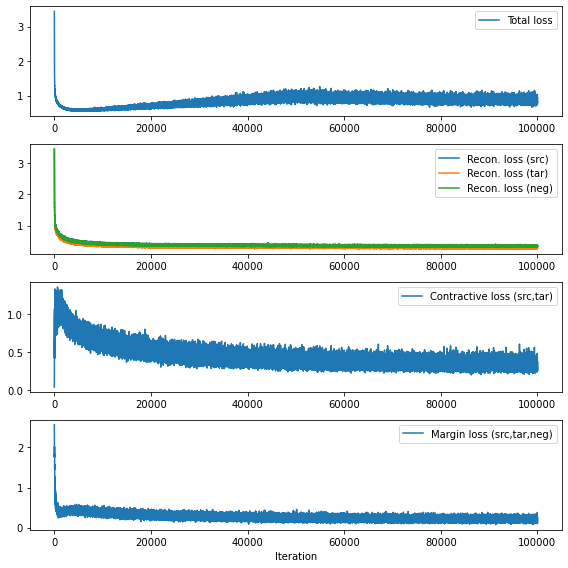

In [14]:
fig, axes = plt.subplots(4,1,figsize=(8,8))

axes[0].plot(df_history.loc[:,"LOSS_TOTAL"], label="Total loss")
axes[1].plot(df_history.loc[:,"LOSS_RECONSTRUCTION_SOURCE"], label="Recon. loss (src)")
axes[1].plot(df_history.loc[:,"LOSS_RECONSTRUCTION_TARGET"], label="Recon. loss (tar)")
axes[1].plot(df_history.loc[:,"LOSS_RECONSTRUCTION_NEGATIVE"], label="Recon. loss (neg)")
axes[2].plot(df_history.loc[:,"LOSS_CONTRACTIVE"], label="Contractive loss (src,tar)")
axes[3].plot(df_history.loc[:,"LOSS_MARGIN"], label="Margin loss (src,tar,neg)")

axes[3].set_xlabel("Iteration")
for ax in axes:
    ax.legend(loc='best')

plt.tight_layout()
plt.show()

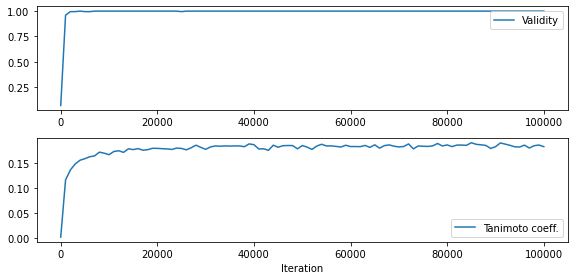

In [15]:
fig, axes = plt.subplots(2,1,figsize=(8,4))

axes[0].plot(df_history_valid.loc[:,"VALID_RATIO"], label="Validity")
axes[1].plot(df_history_valid.loc[:,"AVERAGE_SIMILARITY"], label="Tanimoto coeff.")

axes[1].set_xlabel("Iteration")
for ax in axes:
    ax.legend(loc='best')

plt.tight_layout()
plt.show()